In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_excel('/work/flight/Data_Train.xlsx')
test=pd.read_excel('/work/flight/Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train.shape

(10683, 11)

In [6]:
test.shape

(2671, 10)

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum().sum()

0

In [9]:
test.isnull().sum().sum()

0

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [12]:
train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [14]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
test.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [17]:
train.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [18]:
train['Date_of_Journey']=pd.to_datetime(train.Date_of_Journey)
train.Date_of_Journey.value_counts()

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    281
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    162
2019-03-18    156
2019-12-03    142
2019-09-04    125
2019-03-04    110
2019-06-21    109
2019-06-18    105
2019-06-04    100
2019-04-27     94
2019-04-24     92
2019-03-05     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-12-04     63
Name: Date_of_Journey, dtype: int64

In [19]:
test['Date_of_Journey']=pd.to_datetime(test.Date_of_Journey)
test.Date_of_Journey.value_counts()

2019-09-05    144
2019-12-06    135
2019-05-18    129
2019-06-06    127
2019-06-03    125
2019-09-06    119
2019-05-21    118
2019-05-15    106
2019-06-15    105
2019-03-21     93
2019-03-06     92
2019-03-03     88
2019-01-06     88
2019-06-24     85
2019-03-24     78
2019-01-04     78
2019-09-03     76
2019-06-27     75
2019-06-05     73
2019-05-24     71
2019-12-05     68
2019-03-27     65
2019-05-27     65
2019-01-05     62
2019-01-03     46
2019-12-03     43
2019-03-18     41
2019-03-15     33
2019-03-04     28
2019-03-05     27
2019-09-04     24
2019-06-21     24
2019-04-15     23
2019-04-21     22
2019-06-18     22
2019-04-24     21
2019-04-27     15
2019-06-04     14
2019-04-18     12
2019-12-04     11
Name: Date_of_Journey, dtype: int64

In [20]:
train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
test.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [22]:
train.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [23]:
test.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [24]:
train['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)

In [25]:
test['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)

In [26]:
train.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
DEL → BHO → BOM → COK                  50
CCU → BBI → BLR                        50
CCU → IXR → DEL → BLR             

In [27]:
train.Dep_Time.value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
20:00    185
09:00    184
09:35    183
21:10    180
07:00    167
13:00    164
14:05    163
11:40    161
10:20    159
11:30    158
08:00    152
06:30    140
09:45    139
05:30    138
08:25    136
06:00    131
20:25    125
05:45    122
17:45    118
08:20    114
22:50    114
16:55    109
16:30    109
16:00    100
12:00     98
        ... 
16:35      5
18:30      5
20:10      5
12:20      5
13:40      4
16:15      3
08:40      3
13:50      3
01:40      3
15:35      3
12:10      3
13:45      3
21:55      3
10:25      3
06:15      2
11:20      2
06:35      2
03:05      2
07:20      2
15:25      2
01:35      1
21:40      1
16:25      1
04:50      1
12:05      1
03:00      1
21:35      1
22:25      1
12:45      1
04:15      1
Name: Dep_Time, Length: 222, dtype: int64

In [28]:
train.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
20:45           112
22:30           111
18:50           111
22:50           104
11:20            95
19:50            94
21:20            90
12:20            87
22:25            77
21:05            72
23:35            71
20:05            69
14:05            68
08:35            67
12:00            63
19:45            60
23:00            57
07:15            56
12:55            55
13:15            54
11:25            54
18:10            54
19:40            53
08:45            53
10:40            53
               ... 
20:10             1
20:20 16 Mar      1
00:55 16 Mar      1
18:00 19 May      1
01:20 13 Apr      1
10:40 22 May      1
06:50 25 Jun      1
00:15 16 Apr      1
02:45 28 Apr      1
00:50 19 May      1
02:20 04 May      1
19:10 13 May      1
01:10 10 Mar      1
04:35 10 May      1
11:55 07 Mar      1
20:25 07 May      1
00:15 28 Apr      1
11:05 10 Apr      1
13:15 19 May      1


In [29]:
train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
5h 15m      62
11h 45m     62
11h         62
          ... 
29h 30m      1
31h 30m      1
31h 50m      1
30h 15m      1
19h 50m      1
27h 55m      1
32h 55m      1
3h 25m       1
33h 20m      1
30h 25m      1
41h 20m      1
30h 10m      1
42h 45m      1
5m           1
33h 45m      1
36h 25m      1
29h 10m      1
29h 40m      1
35h 20m      1
42h 5m       1
40h 20m      1
4h 10m       1
47h          1
27h 30m      1
13h 35m      1
35h 35m      1
47h 40m      1
37h 10m      1
32h 20m      1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

In [30]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
train['Total_Stops'].replace(to_replace=['non-stop','1 stop','2 stops','3 stops', '4 stops'],value=[0,1,2,3,4],inplace=True)

In [33]:
test['Total_Stops'].replace(to_replace=['non-stop','1 stop','2 stops','3 stops', '4 stops'],value=[0,1,2,3,4],inplace=True)

In [34]:
train.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [35]:
train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [36]:
train.loc[train.Additional_Info=='In-flight meal not included']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6,Jet Airways,2019-12-03,Banglore,Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087
8,Jet Airways,2019-12-03,Banglore,Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1,In-flight meal not included,9663
17,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,14:00,12:35 13 Jun,22h 35m,1,In-flight meal not included,10262
19,Jet Airways,2019-05-27,Delhi,Cochin,DEL → BOM → COK,16:00,12:35 28 May,20h 35m,1,In-flight meal not included,12898
24,Jet Airways,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,18:55,08:15 07 May,13h 20m,1,In-flight meal not included,7757
33,Jet Airways,2019-06-15,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2,In-flight meal not included,10919
34,Jet Airways,2019-05-18,Delhi,Cochin,DEL → BOM → COK,07:05,12:35,5h 30m,1,In-flight meal not included,12373
42,Jet Airways,2019-05-18,Delhi,Cochin,DEL → BOM → COK,20:55,19:00 19 May,22h 5m,1,In-flight meal not included,12373
49,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2,In-flight meal not included,11150


In [37]:
train.loc[train.Additional_Info=='No check-in baggage included']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
45,SpiceJet,2019-03-24,Banglore,Delhi,BLR → DEL,05:45,08:35,2h 50m,0,No check-in baggage included,3527
79,SpiceJet,2019-03-21,Chennai,Kolkata,MAA → CCU,08:20,10:35,2h 15m,0,No check-in baggage included,3332
96,SpiceJet,2019-05-15,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,0,No check-in baggage included,3257
195,SpiceJet,2019-06-27,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,0,No check-in baggage included,3543
228,SpiceJet,2019-05-21,Mumbai,Hyderabad,BOM → HYD,05:45,07:15,1h 30m,0,No check-in baggage included,1965
243,SpiceJet,2019-12-06,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,0,No check-in baggage included,3543
316,SpiceJet,2019-05-21,Chennai,Kolkata,MAA → CCU,17:45,20:05,2h 20m,0,No check-in baggage included,3543
322,SpiceJet,2019-06-15,Kolkata,Banglore,CCU → BLR,14:55,17:25,2h 30m,0,No check-in baggage included,3841
361,SpiceJet,2019-03-24,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,0,No check-in baggage included,4781
373,SpiceJet,2019-03-04,Banglore,Delhi,BLR → DEL,09:30,12:20,2h 50m,0,No check-in baggage included,3919


In [38]:
train.loc[train.Additional_Info=='2 Long layover']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10511,Air India,2019-01-03,Banglore,Delhi,BLR → BOM → BHO → DEL,06:45,09:25 02 Mar,26h 40m,2,2 Long layover,26480


In [39]:
train.loc[train.Additional_Info=='1 Long layover']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1043,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → DEL,11:05,19:50,8h 45m,1,1 Long layover,14594
2079,Air India,2019-01-03,Banglore,Delhi,BLR → AMD → DEL,00:30,20:30,20h,1,1 Long layover,14752
2405,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,1 Long layover,22270
2481,Air India,2019-01-03,Banglore,Delhi,BLR → AMD → DEL,00:30,23:55,23h 25m,1,1 Long layover,12599
2495,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,16:55,07:40 02 Mar,14h 45m,1,1 Long layover,26890
2556,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,16:55,10:25 02 Mar,17h 30m,1,1 Long layover,25735
3111,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,11:40,21:20,9h 40m,1,1 Long layover,27992
3700,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,22:50,09:30 02 Mar,10h 40m,1,1 Long layover,31825
3788,Air India,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,11:50,13:00 02 Mar,25h 10m,1,1 Long layover,15434
4521,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,16:55,09:00 02 Mar,16h 5m,1,1 Long layover,25735


In [40]:
train.loc[train.Additional_Info=='1 Short layover']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
785,Air India,2019-01-03,Banglore,Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2,1 Short layover,26743


In [41]:
train.loc[train.Additional_Info=='Red-eye flight']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8122,Air Asia,2019-01-03,Banglore,Delhi,BLR → DEL,23:25,02:10 02 Mar,2h 45m,0,Red-eye flight,10873


In [42]:
train.loc[train.Additional_Info=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1,Business class,79512
3032,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1,Business class,28097
5372,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1,Business class,62427
10364,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1,Business class,57209


In [43]:
test.loc[test.Additional_Info=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1802,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1,Business class


In [44]:
train.loc[train.Additional_Info=='Change airports']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1712,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → GAU → DEL,05:50,22:10,16h 20m,2,Change airports,13366
2883,Air India,2019-01-03,Banglore,Delhi,BLR → COK → DEL,22:00,23:20 02 Mar,25h 20m,1,Change airports,14305
3535,Air India,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1,Change airports,26092
8897,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → GAU → DEL,11:05,22:10,11h 5m,2,Change airports,13576
9182,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686
9479,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → BBI → DEL,05:50,16:20,10h 30m,2,Change airports,15119
10149,Air India,2019-01-03,Banglore,Delhi,BLR → VGA → VTZ → DEL,10:30,17:45,7h 15m,2,Change airports,17461


In [45]:
train['Additional_Info'].replace(to_replace='No Info',value='No info',inplace=True)

In [46]:
train.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
14781     84
9663      84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
6442      60
8016      60
3100      58
11087     57
14571     57
13014     57
13941     57
2754      56
4423      53
4544      51
        ... 
9190       1
8030       1
7774       1
11455      1
13532      1
7417       1
9601       1
9790       1
22153      1
5511       1
7574       1
7681       1
3579       1
5567       1
11728      1
9689       1
9694       1
24017      1
9678       1
19907      1
5607       1
9630       1
11647      1
13859      1
7718       1
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null datetime64[ns]
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null int64
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1001.4+ KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null datetime64[ns]
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null int64
Additional_Info    2671 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 208.8+ KB


In [49]:
train['weekno']=train['Date_of_Journey'].dt.dayofweek

In [50]:
test['weekno']=test['Date_of_Journey'].dt.dayofweek

In [51]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,3
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3


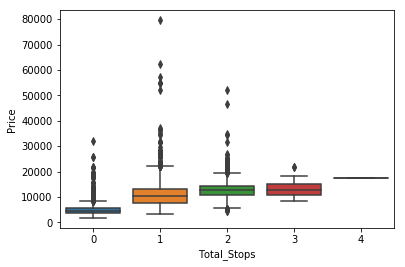

In [52]:
sns.boxplot(x='Total_Stops',y='Price',data=train)

In [53]:
train.loc[(train['Total_Stops']==1) & (train['Price']>40000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno
657,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,10:45,5h,1,No info,52229,3
1478,Jet Airways,2019-03-18,Banglore,Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1,No info,54826,0
2618,Jet Airways,2019-03-18,Banglore,Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1,No info,54826,0
2924,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1,Business class,79512,3
5372,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1,Business class,62427,3
5439,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1,No info,54826,3
10364,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1,Business class,57209,3


In [54]:
train.loc[(train.Airline=='Jet Airways') & (train.Date_of_Journey=='2019-01-03')& (train.Route=='BLR → BOM → DEL')&(train.Dep_Time=='05:45')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno
826,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,16:10,10h 25m,1,No info,26890,3
946,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,19:10,13h 25m,1,No info,27992,3
3257,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,15:15,9h 30m,1,No info,26890,3
4829,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,20:20,14h 35m,1,No info,27992,3
7537,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,18:25,12h 40m,1,No info,26890,3
9632,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,21:20,15h 35m,1,No info,27992,3


In [55]:
train['hour']=pd.to_datetime(train['Dep_Time']).dt.hour

In [56]:
test['hour']=pd.to_datetime(test['Dep_Time']).dt.hour

In [57]:
train.hour.astype(str)

0        22
1         5
2         9
3        18
4        16
5         9
6        18
7         8
8         8
9        11
10        9
11       20
12       11
13       21
14       17
15       16
16        8
17       14
18       20
19       16
20       14
21       22
22        4
23       18
24       18
25       21
26       21
27        7
28        9
29        7
         ..
10653    14
10654     5
10655     2
10656     7
10657    20
10658    11
10659    21
10660    21
10661    13
10662     9
10663    19
10664    18
10665    15
10666    18
10667    22
10668    11
10669     8
10670     5
10671    21
10672    23
10673    13
10674    20
10675     6
10676    10
10677     5
10678    19
10679    20
10680     8
10681    11
10682    10
Name: hour, Length: 10682, dtype: object

In [58]:
test.hour.astype(str)

0       17
1        6
2       19
3        8
4       23
5       18
6        7
7       15
8       10
9       16
10      13
11       6
12       9
13       5
14      19
15      21
16      13
17       9
18      19
19      22
20      10
21      20
22      21
23       5
24      21
25      16
26      15
27      17
28       9
29      14
        ..
2641    14
2642    22
2643     9
2644     7
2645    22
2646    23
2647    16
2648    21
2649     5
2650     5
2651     9
2652    22
2653    16
2654     7
2655    11
2656    21
2657     4
2658    21
2659     5
2660    16
2661    19
2662    13
2663    23
2664    15
2665    22
2666    20
2667    14
2668    21
2669     4
2670     4
Name: hour, Length: 2671, dtype: object

In [59]:
train['zone']= train['hour'].apply(lambda x: 'night' if ((x>=0)&(x<6)) else('morning' if ((x>=6)&(x<12)) else ('afternoon' if((x>=12)&(x<18)) else 'eve')))

In [60]:
test['zone']= test['hour'].apply(lambda x: 'night' if ((x>=0)&(x<6)) else('morning' if ((x>=6)&(x<12)) else ('afternoon' if((x>=12)&(x<18)) else 'eve')))

In [61]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno,hour,zone
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,6,22,eve
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,5,night
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,4,9,morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,3,18,eve
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,16,afternoon


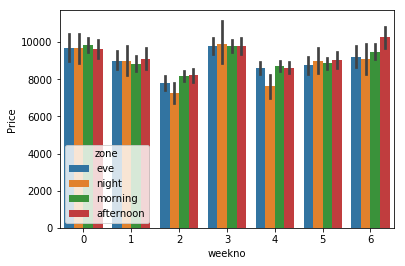

In [62]:
sns.barplot(x='weekno',y='Price',hue='zone',data=train)

In [63]:
bng_0=train.loc[train['Source']=='Banglore']

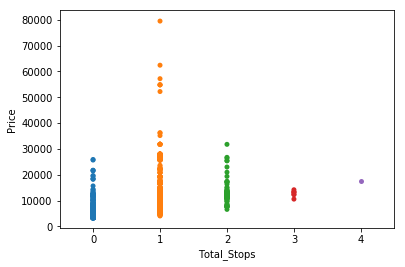

In [64]:
sns.stripplot(x='Total_Stops',y='Price',data=bng_0)

In [65]:
train.drop(train.loc[(train['Total_Stops']==1)&(train['Price']>70000)&(train['Source']=='Banglore')].index,inplace=True)

In [66]:
del_0=train.loc[train['Source']=='Delhi']

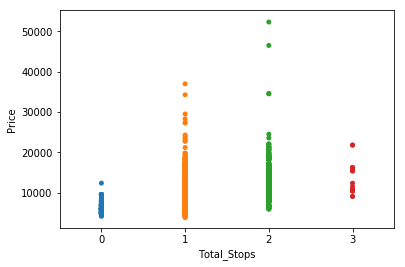

In [67]:
sns.stripplot(x='Total_Stops',y='Price',data=del_0)

In [68]:
train.drop(train.loc[(train['Total_Stops']==2)&(train['Price']>40000)&(train['Source']=='Delhi')].index,inplace=True)

In [69]:
kol_0=train.loc[train['Source']=='Kolkata']

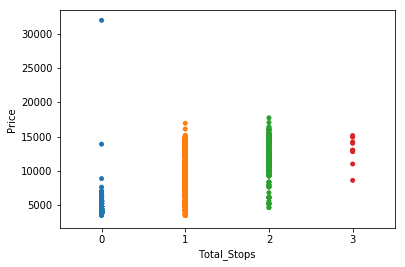

In [70]:
sns.stripplot(x='Total_Stops',y='Price',data=kol_0)

In [71]:
train.drop(train.loc[(train['Price']>10000)&(train['Total_Stops']==0)&(train['Source']=='Kolkata')].index,inplace=True)

In [72]:
mum_0=train.loc[train['Source']=='Mumbai']

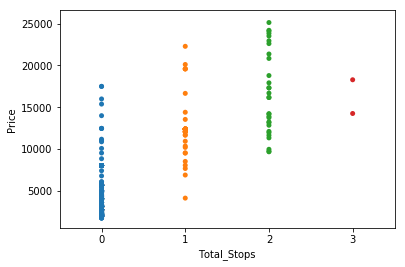

In [73]:
sns.stripplot(x='Total_Stops',y='Price',data=mum_0)

In [74]:
train.drop(train.loc[(train['Total_Stops']==3)&(train['Source']=='Mumbai')].index,inplace=True)

In [75]:
test.loc[(test['Total_Stops']==3)&(test['Source']=='Mumbai')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,weekno,hour,zone


In [76]:
chen=train.loc[train['Source']=='Chennai']

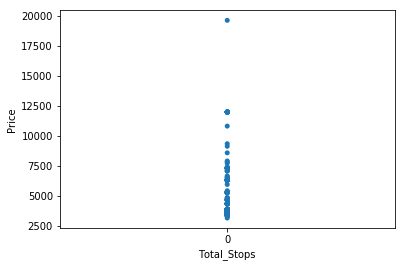

In [77]:
sns.stripplot(x='Total_Stops',y='Price',data=chen)

In [78]:
train[train['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno,hour,zone
9182,Air India,2019-01-03,Banglore,Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686,3,5,night


In [79]:
train.drop(train.loc[(train['Price']>15000)&(train['Source']=='Chennai')].index,inplace=True)

In [80]:
train.drop(train.loc[(train['Airline']=='Trujet')].index,inplace=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

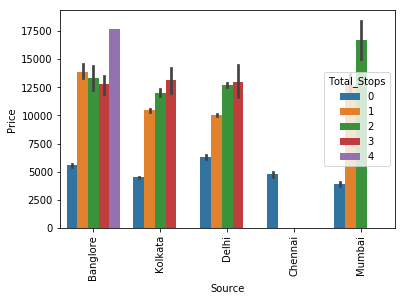

In [81]:
sns.barplot(x='Source',y='Price',hue='Total_Stops',data=train)
plt.xticks(rotation='vertical')

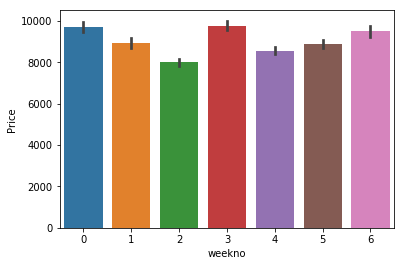

In [82]:
_=sns.barplot(x='weekno',y='Price',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

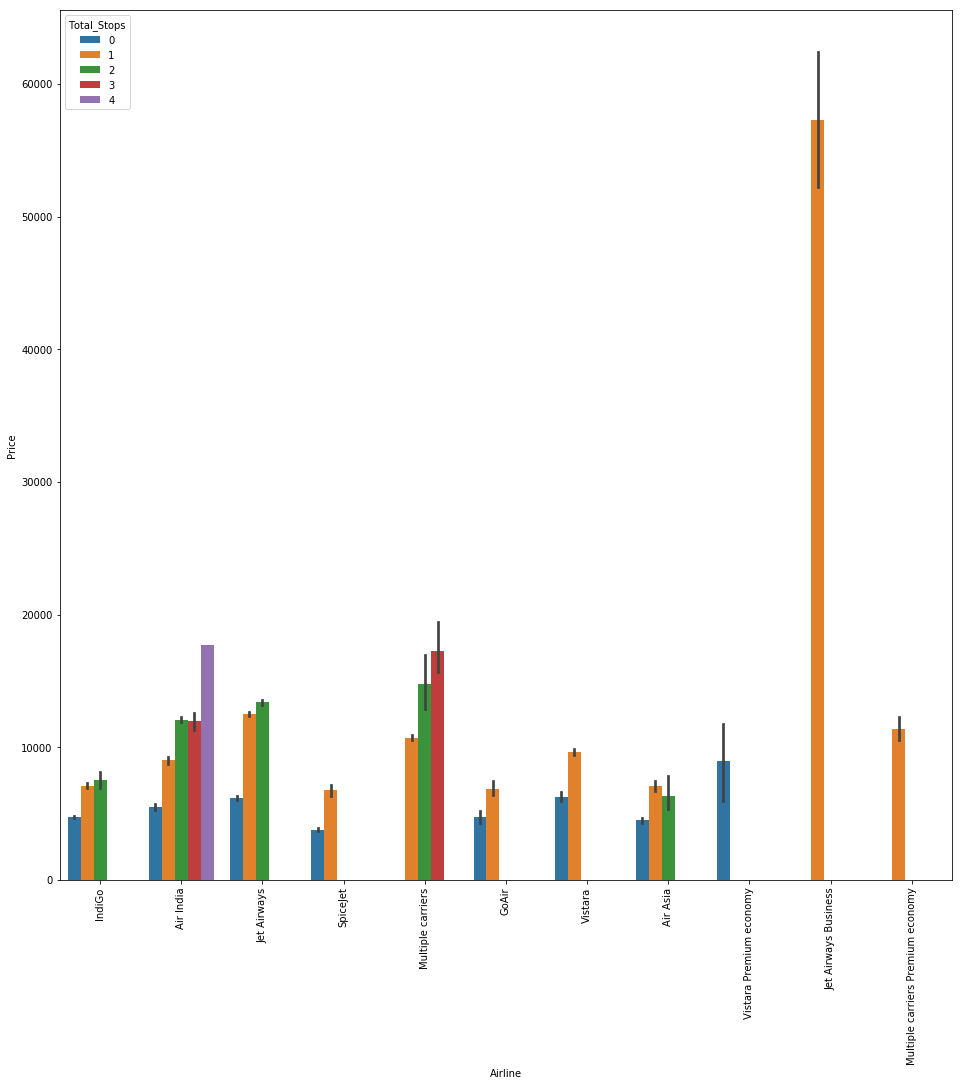

In [83]:
plt.figure(figsize=(16,16))
sns.barplot(x='Airline',y='Price',hue='Total_Stops',data=train)
plt.xticks(rotation='vertical')

In [84]:
new=train['Duration'].str.split('h',n=1,expand=True)
train['h']=new[0]
train['m']=new[1]
new=train['m'].str.split('m',n=1,expand=True)
train['m']=new[0]

In [85]:
new=test['Duration'].str.split('h',n=1,expand=True)
test['h']=new[0]
test['m']=new[1]
new=test['m'].str.split('m',n=1,expand=True)
test['m']=new[0]

In [86]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno,hour,zone,h,m
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,6,22,eve,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,5,night,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,4,9,morning,19,
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,3,18,eve,5,25
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,16,afternoon,4,45


In [87]:
train['h'].replace(to_replace='5m',value=0,inplace=True)

In [88]:
test['h'].replace(to_replace='5m',value=0,inplace=True)

In [89]:
train['h'].value_counts()

2     2399
1      621
3      500
7      487
5      480
9      445
12     428
8      422
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     133
17     129
28      94
29      64
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
39       2
47       2
42       2
41       1
40       1
0        1
Name: h, dtype: int64

In [90]:
test.h.value_counts()

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
21     41
20     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
39      1
40      1
34      1
0       1
Name: h, dtype: int64

In [91]:
train['h']=train['h'].astype(int)

In [92]:
test['h']=test['h'].astype(int)

In [93]:
train['m'].value_counts(dropna=False)
train['m'].replace(to_replace='',value=0,inplace=True)
train['m'].replace(to_replace=np.nan,value=5,inplace=True)
train['m']=train['m'].astype(int)

In [94]:
test.m.value_counts(dropna=False)
test['m'].replace(to_replace='',value=0,inplace=True)
test['m'].replace(to_replace=np.nan,value=5,inplace=True)
test['m']=test['m'].astype(int)

In [95]:
train['m'].dtypes

dtype('int32')

In [96]:
train['h']=train['h']*60

In [97]:
test['h']=test['h']*60

In [98]:
train['duration']=train['h']+train['m']

In [99]:
test['duration']=test['h']+test['m']

In [100]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno,hour,zone,h,m,duration
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,6,22,eve,120,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,5,night,420,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,4,9,morning,1140,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,3,18,eve,300,25,325
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,16,afternoon,240,45,285


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10673 entries, 0 to 10682
Data columns (total 17 columns):
Airline            10673 non-null object
Date_of_Journey    10673 non-null datetime64[ns]
Source             10673 non-null object
Destination        10673 non-null object
Route              10673 non-null object
Dep_Time           10673 non-null object
Arrival_Time       10673 non-null object
Duration           10673 non-null object
Total_Stops        10673 non-null int64
Additional_Info    10673 non-null object
Price              10673 non-null int64
weekno             10673 non-null int64
hour               10673 non-null int64
zone               10673 non-null object
h                  10673 non-null int32
m                  10673 non-null int32
duration           10673 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(4), object(9)
memory usage: 1.7+ MB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

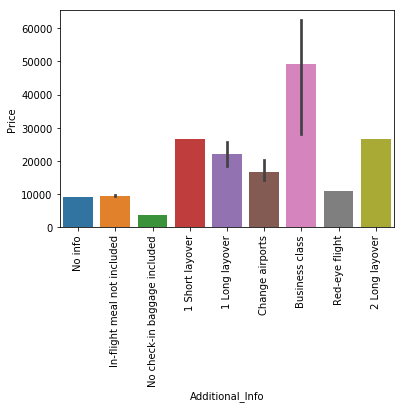

In [102]:
sns.barplot(x='Additional_Info',y='Price',data=train)
plt.xticks(rotation='vertical')

In [103]:
train[train['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekno,hour,zone,h,m,duration
3032,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1,Business class,28097,3,5,night,360,30,390
5372,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1,Business class,62427,3,5,night,360,40,400
10364,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1,Business class,57209,3,9,morning,240,40,280


In [104]:
train.loc[train['Additional_Info'] == 'Business class', 'Airline'] = 'Jet Airways Business'

In [105]:
train['Additional_Info'].value_counts()

No info                         8339
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [106]:
t1=train.drop(['Date_of_Journey','Destination','Route','Dep_Time','Arrival_Time','hour','Duration','h','m','Additional_Info'],axis=1)

In [107]:
tr1=test.drop(['Date_of_Journey','Destination','Route','Dep_Time','Arrival_Time','hour','Duration','h','m','Additional_Info'],axis=1)

In [108]:
t1.head()

,Airline,Source,Total_Stops,Price,weekno,zone,duration
0,IndiGo,Banglore,0,3897,6,eve,170
1,Air India,Kolkata,2,7662,5,night,445
2,Jet Airways,Delhi,2,13882,4,morning,1140
3,IndiGo,Kolkata,1,6218,3,eve,325
4,IndiGo,Banglore,1,13302,3,afternoon,285


In [109]:
tr1.head()

,Airline,Source,Total_Stops,weekno,zone,duration
0,Jet Airways,Delhi,1,3,afternoon,655
1,IndiGo,Kolkata,1,3,morning,240
2,Jet Airways,Delhi,1,1,eve,1425
3,Multiple carriers,Delhi,1,1,morning,780
4,Air Asia,Banglore,0,0,eve,170


In [110]:
t1.describe()

,Total_Stops,Price,weekno,duration
count,10673.000000,10673.000000,10673.000000,10673.000000
mean,0.823761,9068.601705,2.892439,643.101284
std,0.674518,4520.953623,1.835549,507.800961
min,0.000000,1759.000000,0.000000,5.000000
25%,0.000000,5277.000000,1.000000,170.000000
50%,1.000000,8372.000000,3.000000,520.000000
75%,1.000000,12373.000000,4.000000,930.000000
max,4.000000,62427.000000,6.000000,2860.000000


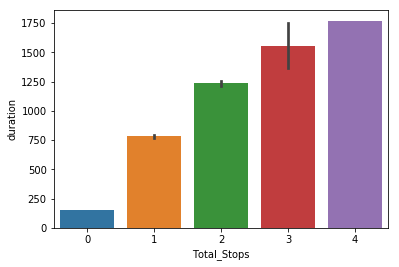

In [111]:
sns.barplot(x='Total_Stops',y='duration',data=t1)

In [112]:
t2=pd.get_dummies(t1)

In [113]:
tr2=pd.get_dummies(tr1)

In [114]:
t2.head()

,Total_Stops,Price,weekno,duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,zone_afternoon,zone_eve,zone_morning,zone_night
0,0,3897,6,170,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,7662,5,445,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,13882,4,1140,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,6218,3,325,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,13302,3,285,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [115]:
t1['zone'].value_counts()

morning      4280
eve          2699
afternoon    2601
night        1093
Name: zone, dtype: int64

In [116]:
test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [117]:
t1['Airline'].value_counts()

Jet Airways                          3848
IndiGo                               2053
Air India                            1746
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    4
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [118]:
t3=t2.drop(['Airline_Jet Airways','zone_morning'],axis=1)

In [119]:
tr3=tr2.drop(['Airline_Jet Airways','zone_morning'],axis=1)

In [120]:
t3.head()

,Total_Stops,Price,weekno,duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,zone_afternoon,zone_eve,zone_night
0,0,3897,6,170,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,7662,5,445,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,13882,4,1140,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,6218,3,325,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,13302,3,285,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [121]:
t3.columns

Index(['Total_Stops', 'Price', 'weekno', 'duration', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'zone_afternoon', 'zone_eve', 'zone_night'],
      dtype='object')

In [122]:
t3['Premium']=t3['Airline_Multiple carriers Premium economy']+t3['Airline_Vistara Premium economy']

In [123]:
tr3['Premium']=tr3['Airline_Multiple carriers Premium economy']+tr3['Airline_Vistara Premium economy']

In [124]:
#t3=t3.drop(['Airline_Air Asia',
 #      'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
  #      'Airline_Multiple carriers',
   #    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
    #   'Airline_Vistara', 'Airline_Vistara Premium economy'],axis=1)

In [125]:
x=t3.drop(['Price'],axis=1)
y=t3.Price.values
names=x.columns

In [126]:
test_x=tr3.copy()

In [127]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

In [128]:
test_X = preprocessing.StandardScaler().fit(test_x).transform(test_x)

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rfr=RandomForestRegressor(max_depth=12)

In [132]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
y_rfr=rfr.predict(x_test)

In [134]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_rfr ))

0.24807480500635637

In [135]:
y_hat=rfr.predict(test_X)

In [138]:
Price=pd.Series(y_hat)

In [139]:
Price.to_excel('/work/flight/flight.xlsx',index=False)